In [2]:
import os
import shutil
import pathlib
import numpy as np

## Moving the Images into one directory

In [3]:
images_path = "../../../Data/IDRID/A_Segmentation/Original_Images"
annotations_path = "../../../Data/IDRID/A_Segmentation/All_Segmentation_Groundtruths/"

In [ ]:
for dn, dp, fn in os.walk(images_path):
    for f in fn:
        print(os.path.join(dn, f))

In [8]:
target_image_path = "../../../Data/IDRID/segmentation_ds/images"
target_annotation_path = "../../../Data/IDRID/segmentation_ds/annotations"

In [12]:
image_names = []

for dn, dp, fn in os.walk(images_path):
    for f in fn:
        if f == ".DS_Store":
            continue
        src_path = os.path.join(dn, f)
        dest_path = os.path.join(target_image_path, f)
        image_names.append(f)
        shutil.copy(src_path, dest_path)

## Moving annotations into their respective directories

In [14]:
image_names_prefixed = [img[:-4] for img in image_names]

In [29]:
image_names_suffixed = [img + ".tif" for img in image_names_prefixed]

In [36]:
destination_dict = dict(zip(image_names_prefixed, image_names_prefixed))

In [1]:
destination_dict

NameError: name 'destination_dict' is not defined

In [15]:
for f in image_names_prefixed:
    ann_path = os.path.join(target_annotation_path, f)
    os.mkdir(ann_path)

In [40]:
for dn, dp, fn in os.walk(annotations_path):

    for f in fn:
        if "OD" in f:
            continue
        if f == ".DS_Store":
            continue
        src_path = os.path.join(dn, f)
        dest_path_dir = destination_dict[f[:-7]]
        dest_path = os.path.join(target_annotation_path, dest_path_dir, f)
        shutil.copy(src_path, dest_path)


## Moving class respective annotations to seperate directories

In [17]:
from tensorflow.keras.utils import load_img, img_to_array, array_to_img, save_img
import cv2

In [4]:
target_classwise_annotation_dir = "../../../Data/IDRID/segmentation_ds/classwise_annotations"

In [185]:
target_classwise_annotation_dir = "../../../Data/IDRID/segmentation_ds/bw_classwise_annotations"

In [186]:
os.mkdir(target_classwise_annotation_dir)

In [187]:
for dn, dp, fn in os.walk(annotations_path):

    for f in fn:
        if "OD" in f:
            continue
        if f == ".DS_Store":
            continue
        if "Training" in dn:
            class_loc = dn[78:]
        else:
            class_loc = dn[77:]
        try:
            img_path = os.path.join(dn, f)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (512, 512), interpolation=cv2.INTER_NEAREST)
            c = np.where(img[:,:,[-1]] == 255)
            #c = np.nonzero(test_img)
            img[c[0], c[1], :] = [1,1,1]
            f_name = f[:-4]
            new_f_name = f_name + ".png"
            dest_path = os.path.join(target_classwise_annotation_dir, class_loc, new_f_name)
            try:
                save_img(dest_path, img, scale=False)
            except:
                os.mkdir(os.path.join(target_classwise_annotation_dir, class_loc))
        except:
            continue
        


## Testing whiting out of image

In [168]:
test_img_path = "../../../Data/IDRID/A_Segmentation/All_Segmentation_Groundtruths/Training_Set/Hard_Exudates/IDRiD_01_EX.tif"

In [169]:
test_img = cv2.imread(test_img_path)

In [171]:
test_img = cv2.resize(test_img, (1024, 1024), interpolation = cv2.INTER_NEAREST)

In [172]:
np.unique(test_img)

array([  0, 255], dtype=uint8)

In [154]:
cv2.imshow("img", test_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [153]:
c = np.where(test_img[:,:,[-1]] == 255)
#c = np.nonzero(test_img)
test_img[c[0], c[1], :] = [255,255,255]

In [46]:
test_img[:,:,:] = [255,255,255]

In [155]:
test_img = array_to_img(test_img)

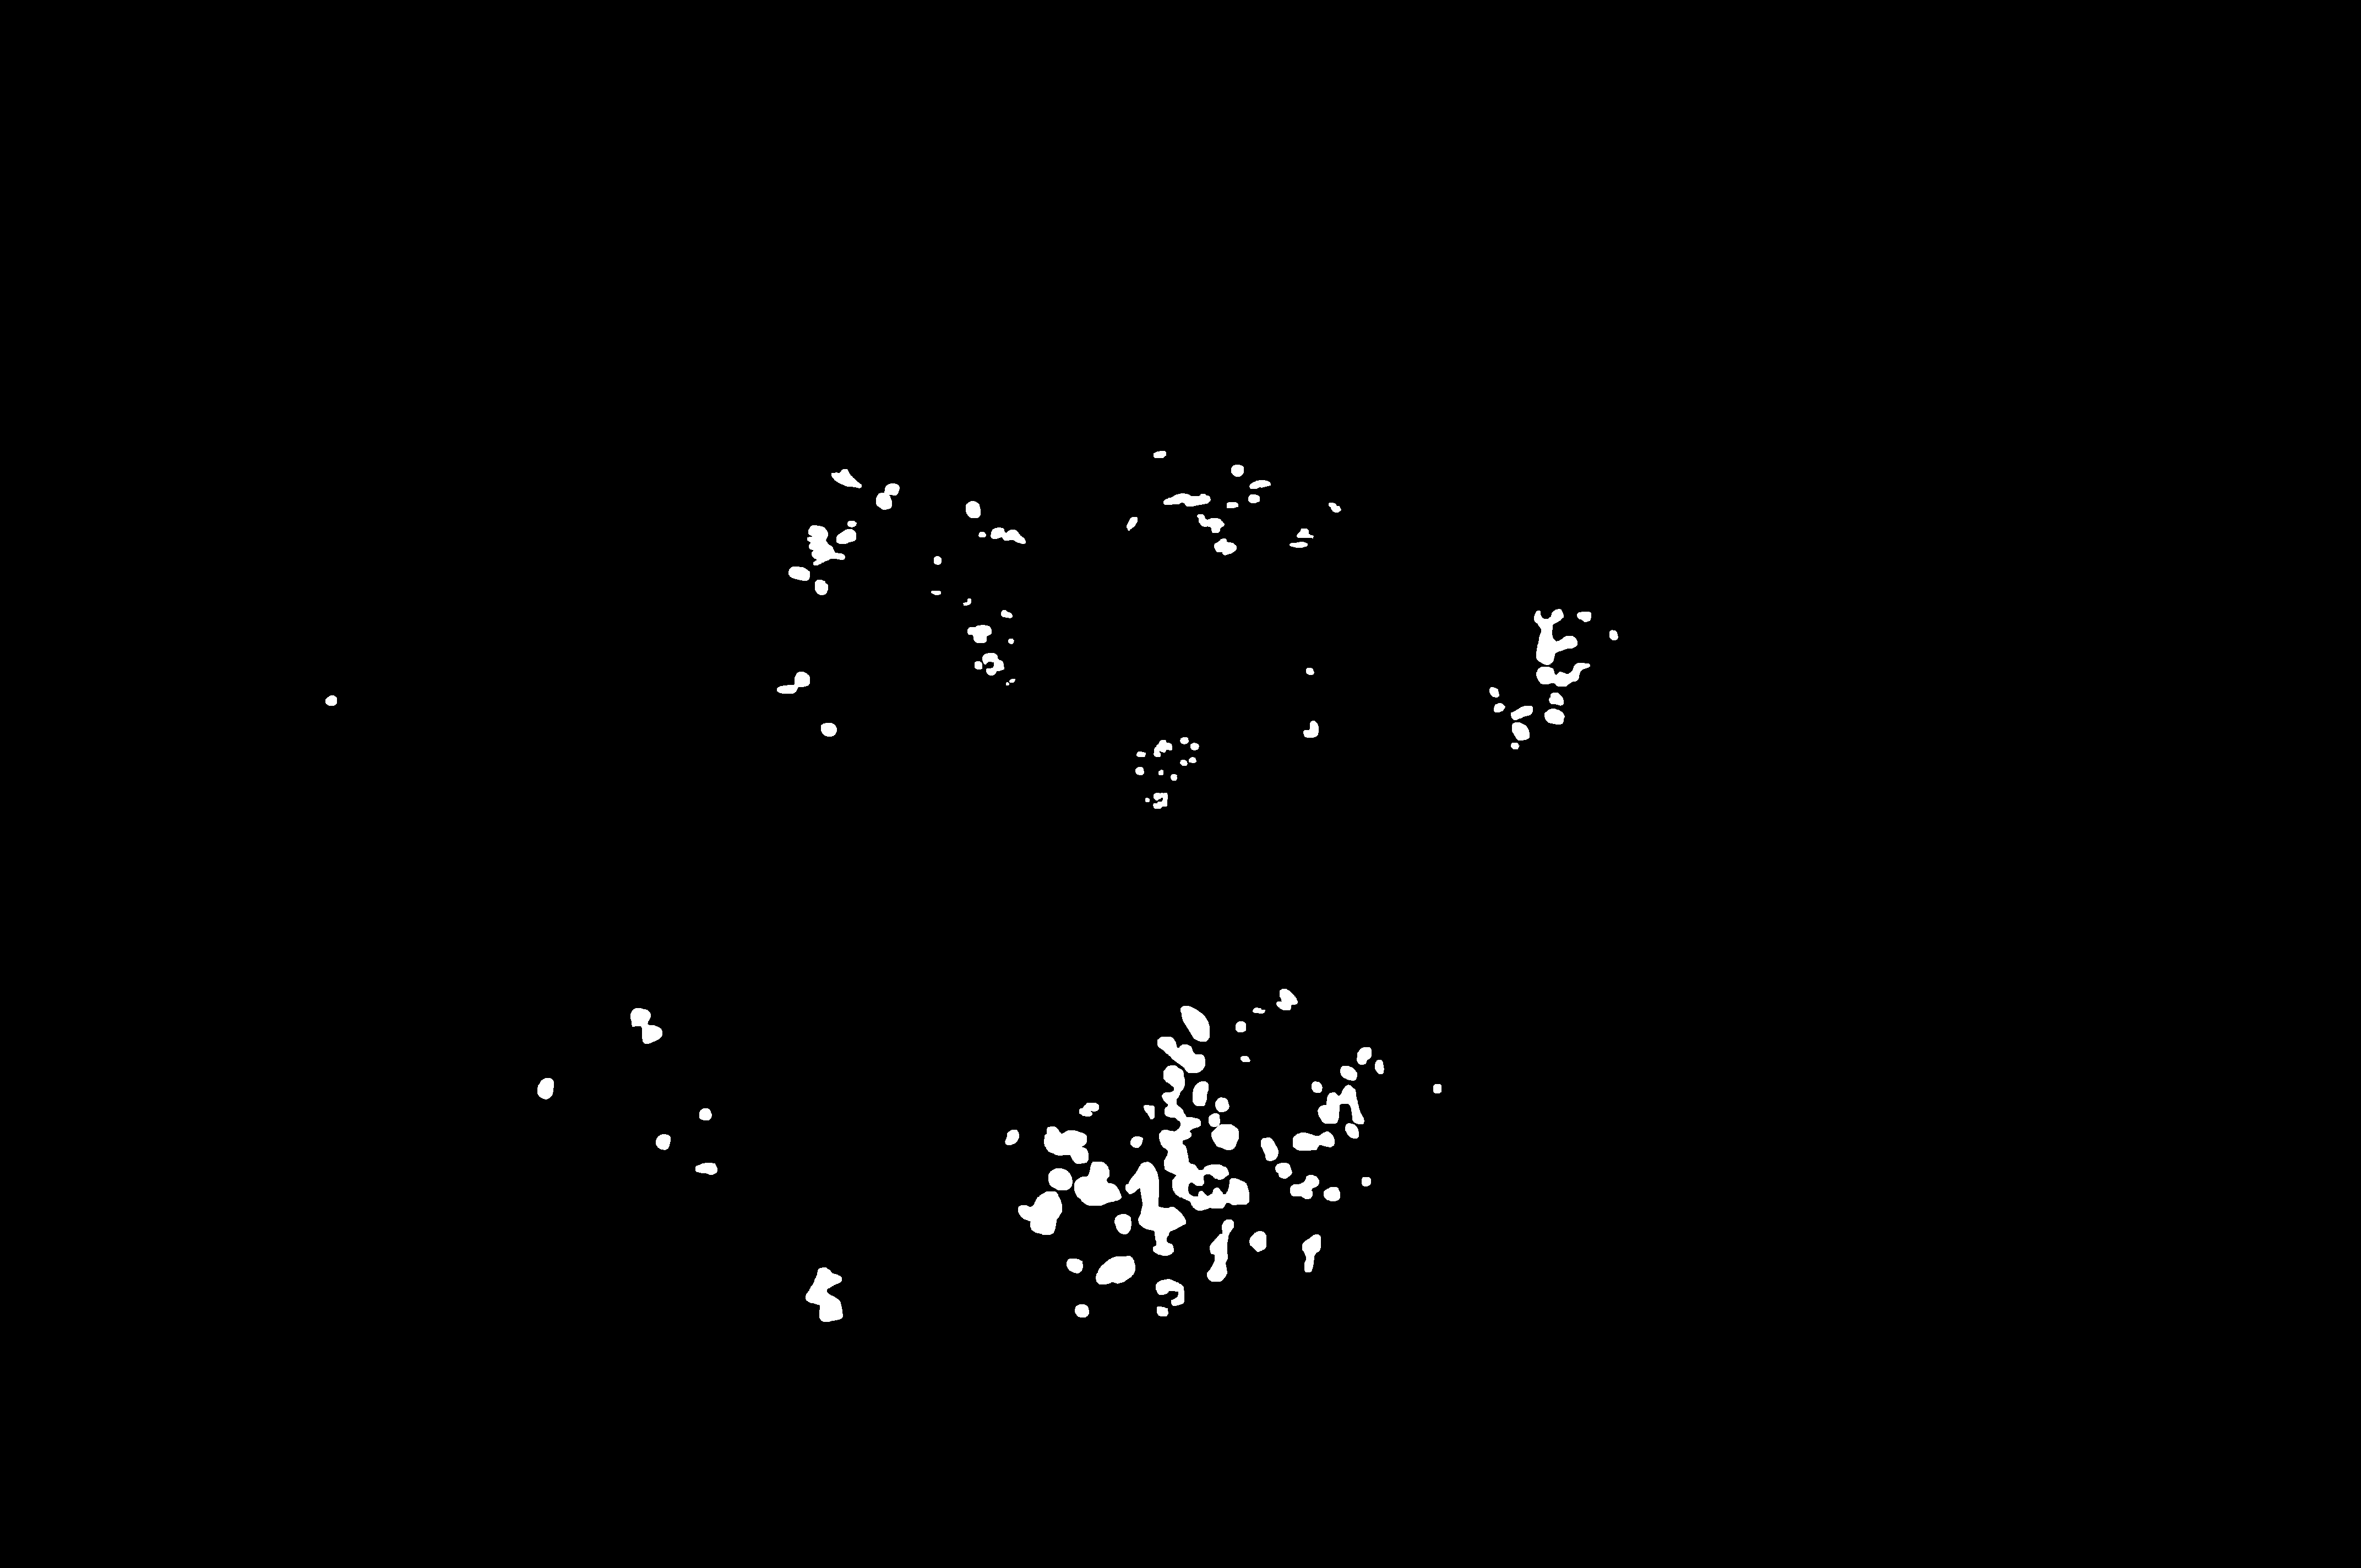

In [156]:
test_img

In [157]:
test_img = img_to_array(test_img)

In [158]:
np.unique(test_img)

array([  0., 255.], dtype=float32)

## Rescaling image

In [188]:
test_path = "../../../Data/IDRID/segmentation_ds/bw_classwise_annotations/Hard_Exudates/IDRiD_01_EX.png"
test_img = cv2.imread(test_path)


In [189]:
np.unique(test_img)

array([0, 1], dtype=uint8)